# **CREDIT EDA - ASSIGNMENT**



------

### **PROBLEM STATEMENT - 1**
--------
Using data to minimise the risk of losing money while lending to customers by understanding the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default and ensuring that the consumers capable of repaying the loan are not rejected.

**Importing Important Libraries**

----



In [2]:
# library for mathematical analysis

import numpy as np
import pandas as pd

# library for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#inline plotting
%matplotlib inline


# Handling warnings
import warnings
warnings.filterwarnings(action='ignore')

**Importing/Reading files**
------




In [3]:
# Creating Dataframe from the given data sets

df = pd.read_csv("application_data.csv")

df_p = pd.read_csv("previous_application.csv")

In [4]:

df.shape

(307511, 122)

In [5]:
df_p.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


#### Data dictionary

In [6]:

df_d = pd.read_csv("columns_description.csv", encoding = 'latin-1' )

In [7]:
df_d.head(2)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN


# **Working with APPLICATION DATA** -

### 1.**DATA INSPECTION**

In [8]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

df.shape
# number of rows and columns


(307511, 122)

In [10]:
df.info()  # datatypes and non  null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

**Mising Value check**

In [12]:
df.isna().sum().sort_values(ascending = False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [13]:
## % occupancy of missing values 

round(100*(df.isna().sum() / len(df)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

##### As DATA is large and not visible in some cases, therefore using DATA VISUALISATION to get an overall view of missing values proportion.

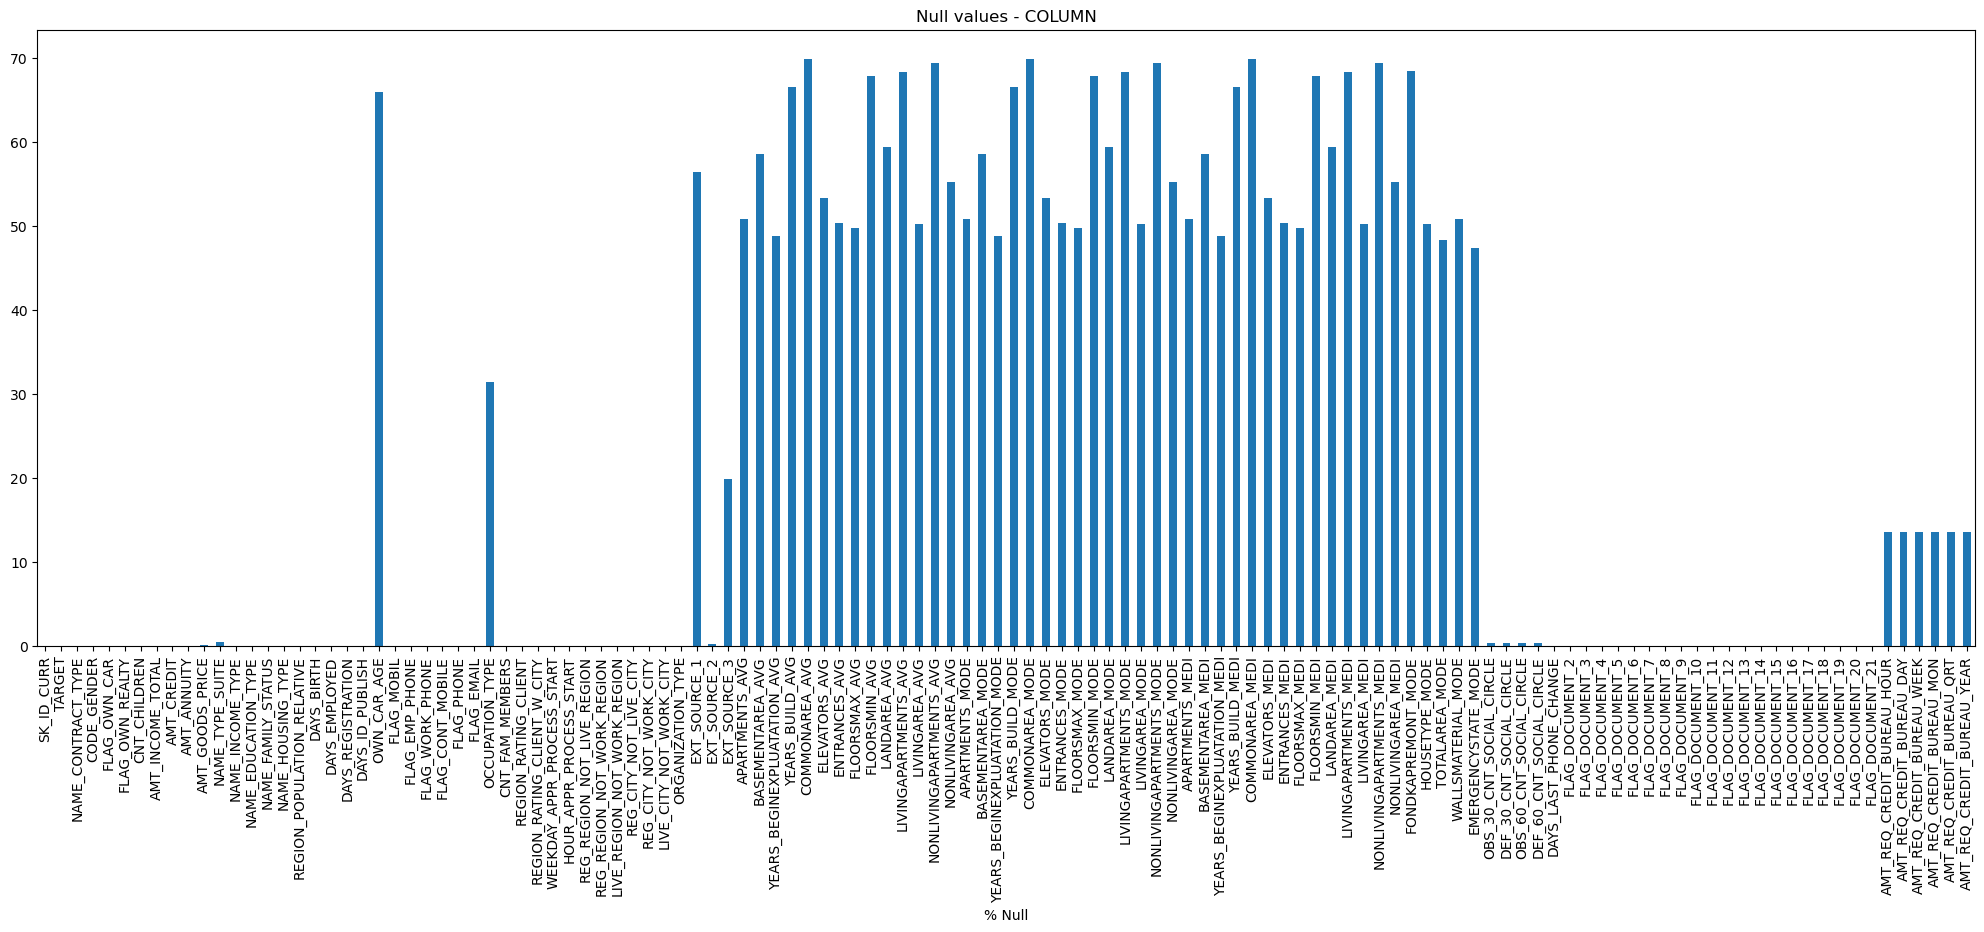

In [14]:

Null_val = round(100*(df.isna().sum() / len(df)),2)
plt.figure(figsize = (25,8), dpi=100)

Null_val.plot(kind = "bar")
plt.title("Null values - COLUMN")
plt.xlabel("% Null")
plt.show()


##### There are columns having null values more than even 50%. Therefore these can be dropped.

### ASSUMPTIONS:

##### 1. Columns like Floor area of the apartments and others seem irrelevant for the case study and can be dropped accordingly.
##### 2. As per industry standards, data having more than 40% missing data could be problematic for analysing purposes. So dropping those columns can be considered a good option.

## 2. **Data Cleaning**

In [15]:
### columns with null values more than 40%

val_40 = Null_val[Null_val >= 40]
val_40


OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [16]:
val_40.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [17]:
## Dropping these columns with null values more than 40%.

df.drop(columns = val_40.index, inplace = True)

In [18]:
# Rechecking the shape of the Application Data after dropping values

df.shape

(307511, 73)

##### After dropping columns with more than or equal to 40 % of missing data there are 73 columns.

In [19]:
## checking  for null values again
df.isna().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 73, dtype: int64

In [20]:
## New null values count-  %
N_null =(100*(df.isna().sum())/len(df))
N_null.info


<bound method Series.info of SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64>

In [21]:
## columns with less than 15% null values

null_15 = N_null[N_null < 15]
print(null_15)
print("Columns with less than 15% missing values :" , len(null_15))


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 71, dtype: float64
Columns with less than 15% missing values : 71


In [22]:
null_15.index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
df.shape

(307511, 73)

###### SEGREGATING columns as Categorial and Numerical

#### 1. Categorial columns - Columns with datatype as object are categorised as CATEGORIAL COLUMN

----



In [25]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [26]:
### checking info for object type columns

o_df = df.select_dtypes(include = "object").columns
o_df.isnull().sum()

0

In [27]:
o_df

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

#### 2. Numerical columns - Columns with datatype as float or integer are categorised as NUMERICAL COLUMN
----

In [28]:
df.select_dtypes(include = ["int64", "float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [29]:
i_df = df.select_dtypes(include = ["int64", "float64"]).columns
i_df.isnull().sum()

0

In [30]:
df.select_dtypes(include = ["int64", "float64"]).describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


1. There are columns with DAYS that contain negative values. It can be imputed by changing the data of the column in years
2. Column with children has a max value as 19 that could be an outlier.

* Depending upon the relevance, these columns can be imputed.

* However DAYS columns does not seem to be of much relevance with respect to our analysis as Age or days of employement or days of changing application data before does not seem to be a factor that determines whether a person is likely to default or not here, according to this data.


**Removing irrelevant collumns**

In [31]:
n_df = ['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
n_df

['REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT

In [32]:
### dropping these columns of n_df

df = df.drop(n_df, axis = 1)
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,WEDNESDAY,Business Entity Type 3,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,1,Core staff,2.0,MONDAY,School,0.622246,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,MONDAY,Government,0.555912,0.729567


#### 23 Columns are doable for analysis

In [33]:
df.shape

(307511, 23)

In [34]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
FLAG_CONT_MOBILE                  0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
dtype: int64

### **DATA UNDERSTADING AND IMPUTATION**

##### Our target Variable is "TARGET" column that tell us whether any applicant is bound to be defaulter or not based on certain factors.

##### LISTED BELOW ARE THE COLUMNS TO BE FOUND SUITABLE FOR ANALYSIS REQUIRED TO PREDICT THE DEFAULTER CASES BASED ON FACTORS MENTIONED ALONG.
```
# 1. Following Columns can add to the value to our analysis based on the basic understanding of the personal level information required for any applicant. These factors may affect the capability of the applicants to pay the loan amount in a specified period of time.

* These are the columns that are left after dropping the columns with max missing %age of data*

    1. CODE_GENDER     : Gender of the applicant
    2. CNT_CHILDREN    : Number of children applicant has
    3. AMT_INCOME_TOTAL: Income of the applicant
    4. AMT_ANNUITY     : Loan annuity
    5. AMT_GOODS_PRICE : Price of good for which loan is given
    6. NAME_INCOME_TYPE : Clients income type
    7. NAME_EDUCATION_TYPE : Level of highest education
    8. OCCUPATION_TYPE : Type of occupation type of the client
    9. CNT_FAM_MEMBERS : Count of family members
    10. EXT_SOURCE_1 : Normalised score from external data source...
    11. EXT_SOURCE_2 : Normalised score from external data source...
    12. EXT_SOURCE_3 : Normalised score from external data source...





```
#### NOTE:  Columns describing floor areas of the apartments, client type, dues if any, and other columns can be regarded as irrelevant as these do not support the capacity of the applicant or are either required by banks for application process. So, these can be ignored.

In [35]:
### TARGET COLUMN

df["TARGET"].isna().sum()

0

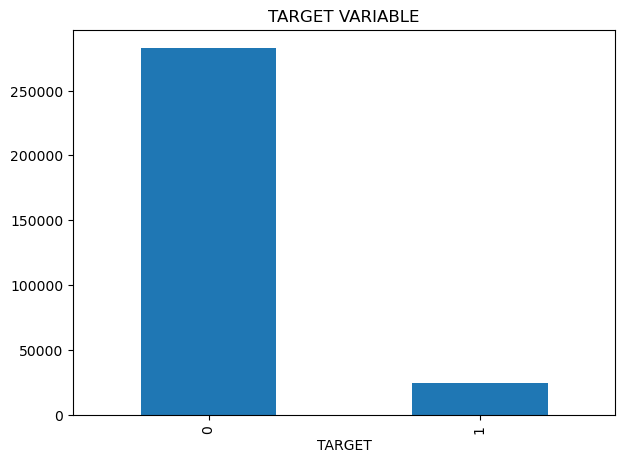

In [38]:
plt.figure(figsize=(7,5))
df.TARGET.value_counts().plot(kind = 'bar')
plt.title('TARGET VARIABLE')
plt.show()

In [39]:
df.TARGET.value_counts(normalize = True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

## 0 and 1 refers to:

#### 1 : Defaulters
#### 0 : Non - Defaulters

### Clearly, the percentage share of the Defaulters is very less compared to the non-Defaulters and this Data is absolutely fine as inorder to flourish, a loan company should not have much defaulters.


#### **Seggregating the DEFAULTERS and NON-DEFAULTERS from the TARGET column.**

In [40]:
### defaulters

defaul = df[(df.TARGET == 1)]
defaul.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,WEDNESDAY,Business Entity Type 3,0.262949,0.139376
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Secondary / secondary special,Widow,House / apartment,1,Cooking staff,1.0,MONDAY,Business Entity Type 3,0.548477,0.190706
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Secondary / secondary special,Married,House / apartment,1,Laborers,2.0,TUESDAY,Business Entity Type 3,0.306841,0.320163


In [41]:
## non-defaulters

n_defaul = df[(df.TARGET == 0)]
n_defaul

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,1,Core staff,2.0,MONDAY,School,0.622246,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,MONDAY,Government,0.555912,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Secondary / secondary special,Civil marriage,House / apartment,1,Laborers,2.0,WEDNESDAY,Business Entity Type 3,0.650442,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Secondary / secondary special,Single / not married,House / apartment,1,Core staff,1.0,THURSDAY,Religion,0.322738,NaN
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Secondary / secondary special,Married,House / apartment,1,Laborers,2.0,WEDNESDAY,Other,0.354225,0.621226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,Secondary / secondary special,Single / not married,House / apartment,1,NaN,1.0,MONDAY,XNA,0.346391,0.742182
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Secondary / secondary special,Separated,With parents,1,Sales staff,1.0,THURSDAY,Services,0.681632,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Secondary / secondary special,Widow,House / apartment,1,NaN,1.0,MONDAY,XNA,0.115992,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Higher education,Separated,House / apartment,1,Managers,1.0,THURSDAY,School,0.535722,0.218859


In [42]:
## % missing data
100 * df.isna().sum() / len(df)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
FLAG_CONT_MOBILE               0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
dtype: float64

### 3. *DATA IMPUTATION*

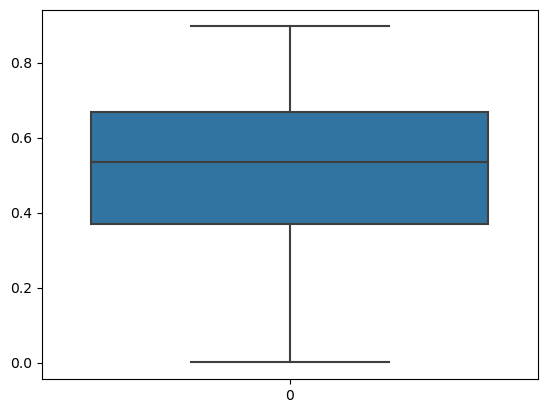

In [43]:
## EXT_SOURCE_3 has 19 % missing data, so imputation is required.
### checking for the outliers if any

sns.boxplot(df["EXT_SOURCE_3"])
plt.show()

#### There are no OUTLIERS in this category. So, we can easily impute the missing values with the mean value.

In [44]:
df["EXT_SOURCE_3"] = df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].mean())
df["EXT_SOURCE_3"].isna().sum()

0

In [45]:
## EXT_SOURCE_2 has 0.21 % missing data, so imputation is required.

df["EXT_SOURCE_2"].describe()



count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

##### By looking at the median and mean, there is not much significant difference.
##### 25% and 75% values does not seem to be deviating much and data seems fine.
##### Filling the null values with mean

In [46]:
df["EXT_SOURCE_2"] = df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].mean())
df["EXT_SOURCE_2"].isna().sum()

0

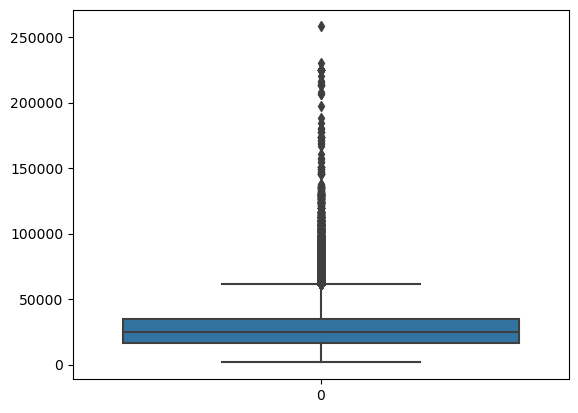

In [47]:
### AMT_ANNUITY : annuity amount
sns.boxplot(df["AMT_ANNUITY"])
plt.show()


#### There are lot of outliners in the range of around 75000 to 120000. As this data refers to the loan annuity amount, so it can vary depending upon the amount of loan applied for and its not problematic.


In [48]:

df.AMT_ANNUITY.median()

24903.0

In [49]:

### Filling NA with median for ANNUITY amount as this column has lots of outliners.

df["AMT_ANNUITY"] = df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median())
df["AMT_ANNUITY"].mean()

27108.48784108536

In [50]:
### OCCUPATION_TYPE
### there is 31 % data missing in this category

df.OCCUPATION_TYPE.value_counts()


OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [51]:
#### Imputing with the mode for the missing values as this is a "CATEGORIAL DATA"

df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna(df["OCCUPATION_TYPE"].mode()[0])
df["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [52]:

df["OCCUPATION_TYPE"].isna().sum()

0

In [53]:
### GENDER category

df.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)



```
There are 3 values in GENDER category and requires some inspection and fixing.
```



In [54]:
df.CODE_GENDER.isna().sum()

0

In [55]:


df.CODE_GENDER.value_counts(normalize = True)*100

CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64



```
Female % age occupancy is more as compared to the Males.
Replacing the "XNA" with mode as this a categorial column.
```



In [56]:
df.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [57]:
df["CODE_GENDER"] = df.CODE_GENDER.replace('XNA', 'F')
df.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [58]:
#### children count
df.CNT_CHILDREN.isna().sum()

0

In [59]:


100 * df.isna().sum() / len(df)


SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.090403
NAME_TYPE_SUITE               0.420148
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
FLAG_CONT_MOBILE              0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000650
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
EXT_SOURCE_2                  0.000000
EXT_SOURCE_3                  0.000000
dtype: float64

**For following columns % age share of missing data is not much significant so they can be removed.**

In [60]:
### AMT_GOODS_PRICE : Price of goods for which loan is given

df["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

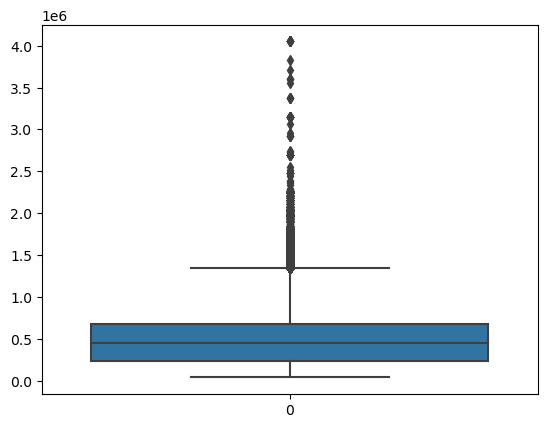

In [61]:
sns.boxplot(df["AMT_GOODS_PRICE"])
plt.show()

##### There are lots of outliers in this category.
##### Replacing the missing values with would make it little unreliable for analysis.
##### Missing values can be removed as it constitute only little percent of the missing data.

In [62]:
### removing missing values
df = df[~np.isnan(df['AMT_GOODS_PRICE'])]
df["AMT_GOODS_PRICE"].isna().sum()

0

In [63]:
### FAMILY MEMBERS COUNT IN A FAMILY

## Removing the "NAN" values as %age missing data is very less

df = df[~np.isnan(df['CNT_FAM_MEMBERS'])]
df["CNT_FAM_MEMBERS"].isna().sum()

0

.

In [64]:
### EDUCATION

df.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218191
Higher education                  74798
Incomplete higher                 10267
Lower secondary                    3813
Academic degree                     164
Name: count, dtype: int64

In [65]:
### INCOME TYPE CATEGORY
df.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158589
Commercial associate     71570
Pensioner                55339
State servant            21680
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [66]:
df.NAME_INCOME_TYPE.isna().sum()   ## no null values


0

In [67]:
### INCOME CATEGORY

df.AMT_INCOME_TOTAL.isnull().sum()

0

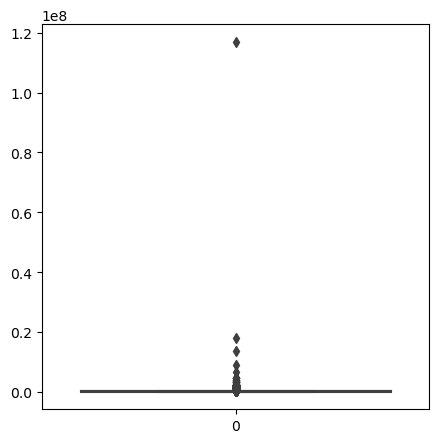

In [68]:
plt.figure(figsize = (5,5))
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()



```
 There is only one outlier at 1.2 units(millions) and its possible for certain applicant to fall under that category
```



In [69]:
### ORGANIZATION_TYPE
df.ORGANIZATION_TYPE.isna().sum()


0

In [70]:
df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [71]:
df.ORGANIZATION_TYPE.mode()

0    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object

In [72]:
df["ORGANIZATION_TYPE"] = df.ORGANIZATION_TYPE.replace("XNA", "Business Entity Type 3" )
df["ORGANIZATION_TYPE"].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Electricity', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Transport: type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military',
       'Services', 'Security Ministries', 'Transport: type 4',
       'Industry: type 1', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Industry

## **GRAPHICAL ANALYSIS**
---

In [73]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

# **Data Visualisation for Application Data**

In [74]:
defaul.head(2) # deafulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,WEDNESDAY,Business Entity Type 3,0.262949,0.139376
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Secondary / secondary special,Widow,House / apartment,1,Cooking staff,1.0,MONDAY,Business Entity Type 3,0.548477,0.190706


In [75]:
n_defaul.head(2)  ## non defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,1,Core staff,2.0,MONDAY,School,0.622246,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,MONDAY,Government,0.555912,0.729567


In [76]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,WEDNESDAY,Business Entity Type 3,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,1,Core staff,2.0,MONDAY,School,0.622246,0.510853



```

# **ANALYSIS**

**1. CATEGORIAL VARIABLES Vs TARGET** *

```





```
* OCCUPATION_TYPE
```



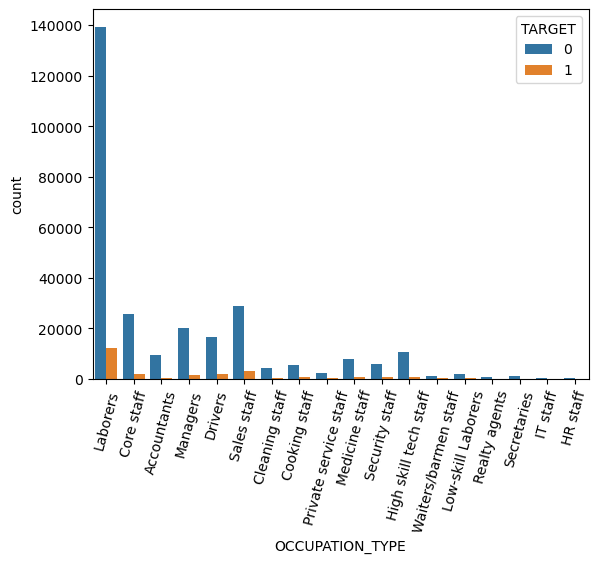

In [77]:

sns.countplot(x = "OCCUPATION_TYPE", hue ="TARGET", data = df)
plt.xticks(rotation = 75)
plt.show()


OCCUPATION TYPE Vs DEFAULTERS/ NON DEFAULTERS

IN THE ABOVE GRAPH:

```
1. MAX number of defaulters fall under the category of labourers who have taken the loan.
2. There is no significant data for the HR staff.
3. SALES staff after labourers is the category with 2nd highest share of defaulters.
```

CONCLUSION :

Not much variation in TARGET audience with organisation type. 
HOWEVER, labourers record need to be looked upon while providing loans.



VARIATION  OF TARGET VARIABLE WITH DIFFERENT CATEGORIAL VARIABLES
-----


In [78]:
cat_var1 = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
cat_var2 = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE' ]
cat_var3 = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS','CODE_GENDER']
cat_var4 = ['CODE_GENDER']

In [79]:
enumerate(cat_var1)

In [80]:
list(enumerate(cat_var1))

[(0, 'OCCUPATION_TYPE'), (1, 'ORGANIZATION_TYPE')]

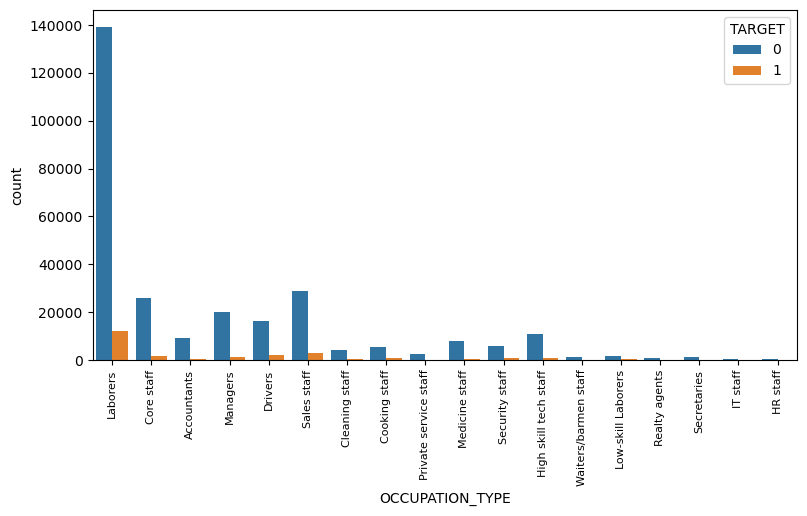

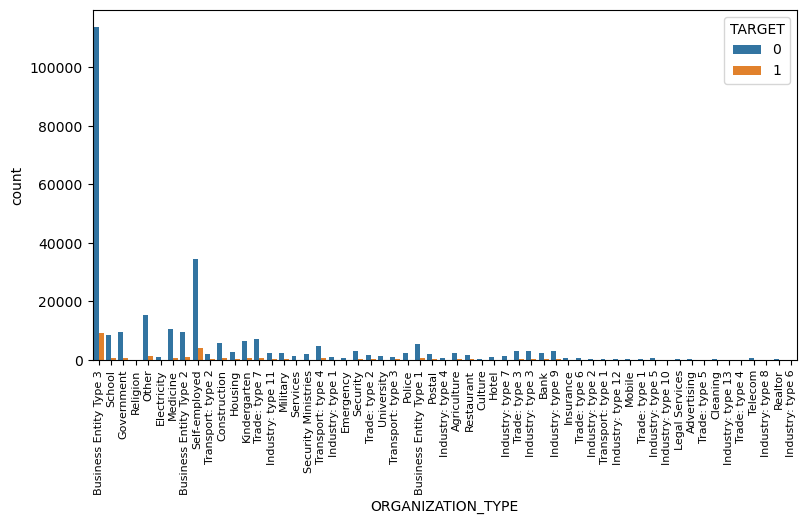

In [83]:
for i in enumerate(cat_var1):
    plt.figure(figsize=(20,10))

    plt.subplot( 2,2, i[0]+1)
    sns.countplot(x = i[1], hue = "TARGET", data = df)
    plt.xticks(rotation = 90, fontsize = 8)

### For ORGANISATION TYPE Vs TARGET
-----
 1. BUSINESS ENTITY TYPE 3 HAS HIGHEST NUMBER OF DEFAULTERS AS WELL AS THE ONE WITH THE NON DEFAULTERS.
 2. THE SECOND POSITION IS OUCCUPIED BY SELF EMPLOYED PEOPLE.
 3. OTHER CATEGORY FALLS UNDER THE 3RD PLACE.

In [130]:
enumerate(cat_var2)
enumerate(cat_var3)

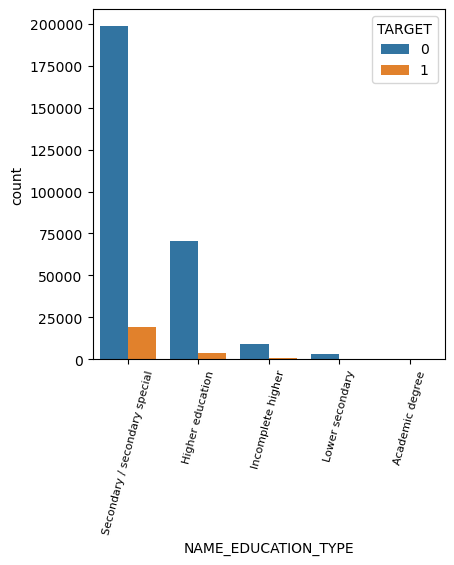

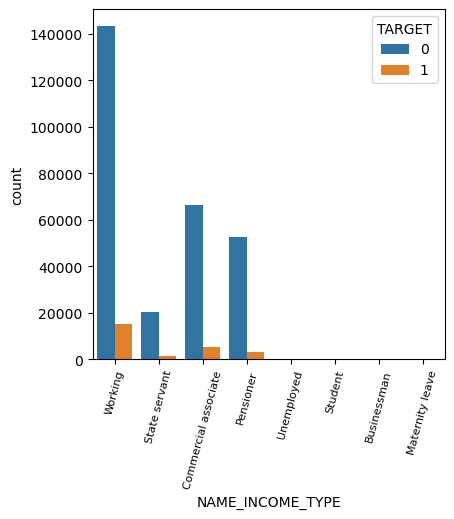

In [134]:
for i in enumerate(cat_var2):
    plt.figure(figsize=(10,10))

    plt.subplot(2,2, i[0]+1)
    sns.countplot(x = i[1], hue = "TARGET", data = df)
    plt.xticks(rotation = 75, size = 8)


### EDUCATION TYPE AND INCOME TYPE Vs TARGET VARIABLE

----
1. Secondary educated category has highest number of defaulters as well as non defaluters
2. People with higher education apply for loan and pay loan on time. This category has less number of defaulters. 
3. Working category people apply for loan and fall under income category of people who might default.

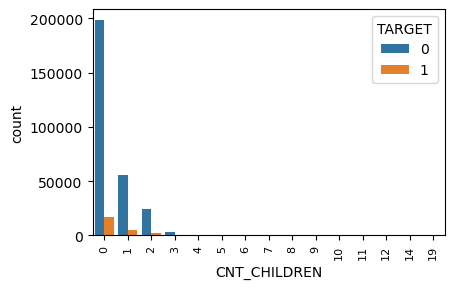

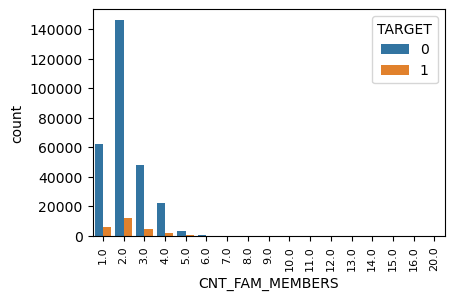

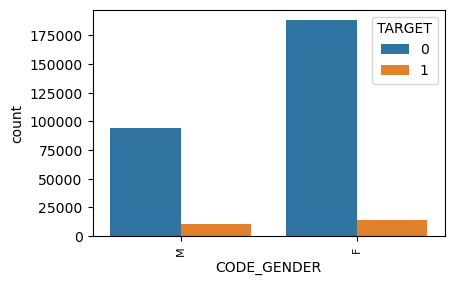

In [139]:
for i in enumerate(cat_var3):
    plt.figure(figsize=(10,10))

    plt.subplot(3,2, i[0]+1)
    sns.countplot(x = i[1], hue = "TARGET", data = df)
    plt.xticks(rotation = 90, size = 8)

### Target variable Vs  Gender, Family  and children
----
1. People with no children fall under defaulter and non defaluter category to th highest.
2. People with only 2 members in the family have highest and defaulter and non defaluter.
3. There is not much significant difference between defaulters category in Terms of GENDER. 
4. Females are much reliable category in terms of repayment of loans.

**1. NUMERICAL VARIABLES Vs TARGET**

In [140]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,WEDNESDAY,Business Entity Type 3,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,1,Core staff,2.0,MONDAY,School,0.622246,0.510853


**Creating bins for the variables**

In [141]:
#### AMT_INCOME_TOTAL

bin_inc = [0,100000,200000,300000,400000,500000,10000000000]
rge = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

df['AMT_INCOME_TOTAL'] = pd.cut(df['AMT_INCOME_TOTAL'], bins = bin_inc, labels= rge)
df.AMT_INCOME_TOTAL.head()

0    200000-300000
1    200000-300000
2          <100000
3    100000-200000
4    100000-200000
Name: AMT_INCOME_TOTAL, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [142]:
#### AMT_GOODS_PRICE
bin_gds = [0,100000,200000,300000,400000,500000,10000000000]
rge1 = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

df['AMT_GOODS_PRICE'] = pd.cut(df['AMT_GOODS_PRICE'], bins = bin_gds, labels= rge1)
df.AMT_GOODS_PRICE.head()

0       300000-400000
1    500000 and above
2       100000-200000
3       200000-300000
4    500000 and above
Name: AMT_GOODS_PRICE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [143]:
##### AMT_ANNUITY

df.AMT_ANNUITY.value_counts()

AMT_ANNUITY
9000.0      6326
13500.0     5463
6750.0      2244
10125.0     2000
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13672, dtype: int64

In [144]:
df.AMT_ANNUITY.describe()

count    307233.000000
mean      27120.365747
std       14491.830414
min        1615.500000
25%       16551.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [145]:
bin_ann = [0, 5000, 10000,  20000, 40000, 60000, 80000, 100000, 150000]
rge2 = ['<2000','2000-5000', '5000-10000','10000-40000','40000-80000','80000-10000', "100000-150000", "150000 and above"]

df['AMT_ANNUITY'] = pd.cut(df['AMT_ANNUITY'], bins = bin_ann, labels= rge2)
df.AMT_ANNUITY.head()


0    10000-40000
1    10000-40000
2      2000-5000
3    10000-40000
4    10000-40000
Name: AMT_ANNUITY, dtype: category
Categories (8, object): ['<2000' < '2000-5000' < '5000-10000' < '10000-40000' < '40000-80000' < '80000-10000' < '100000-150000' < '150000 and above']

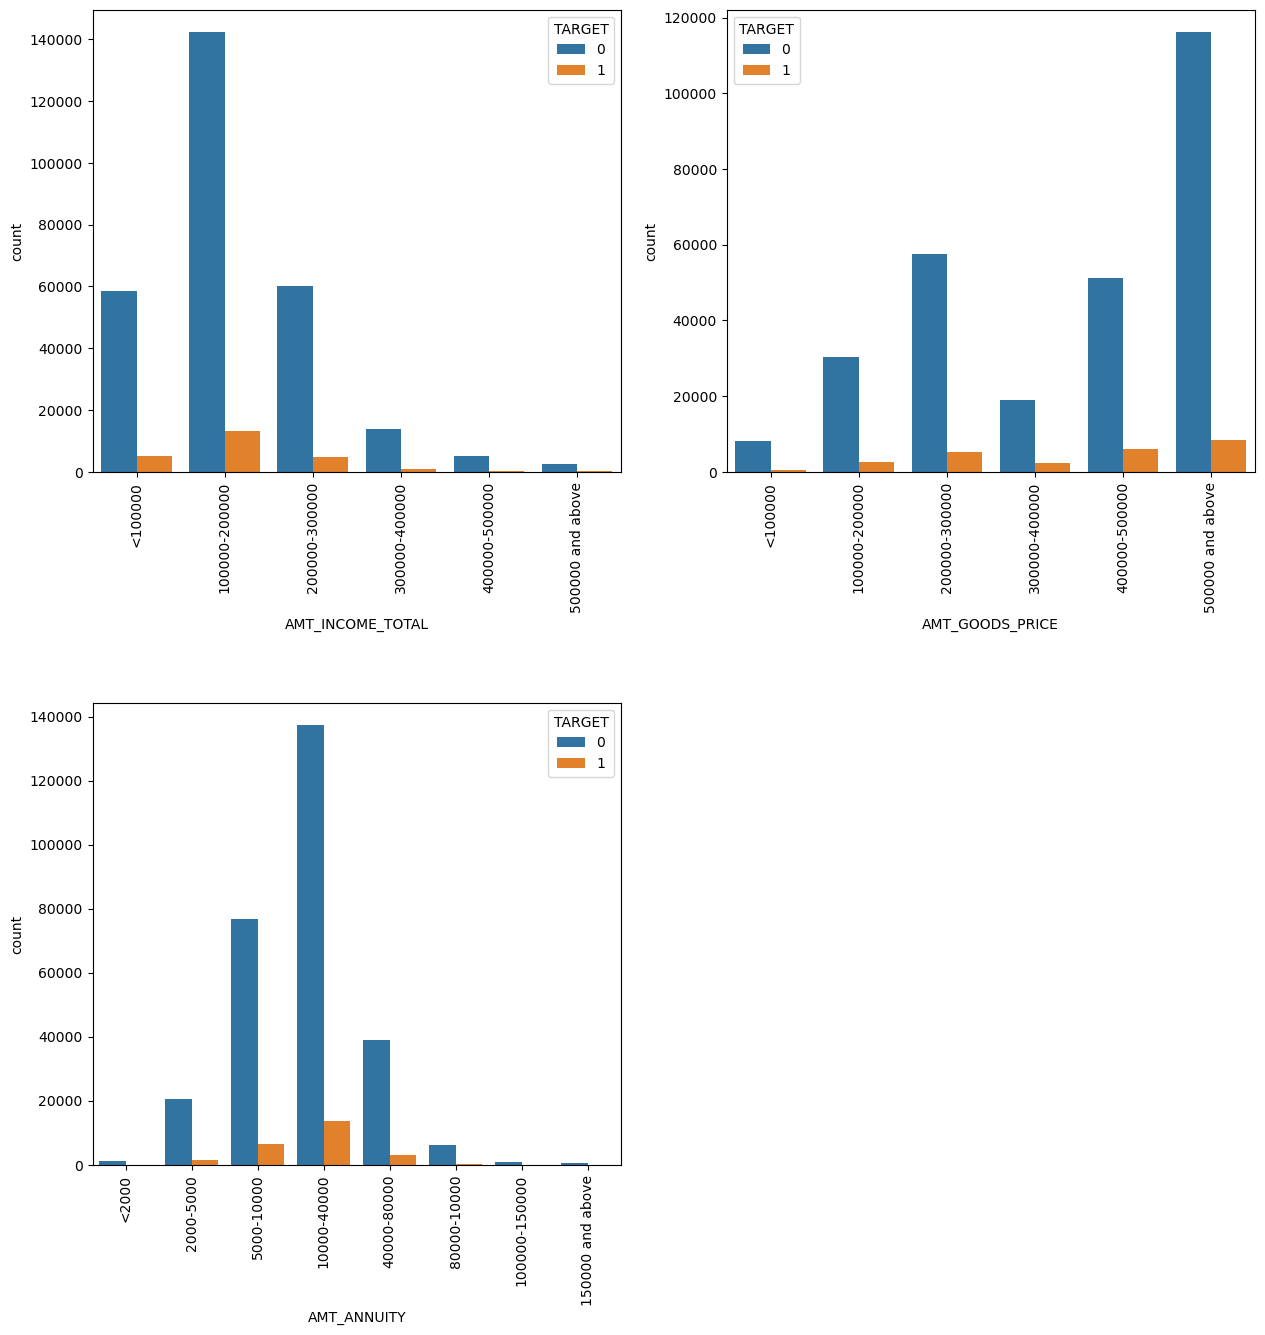

In [146]:
num_var = ['AMT_INCOME_TOTAL','AMT_GOODS_PRICE', 'AMT_ANNUITY']
plt.figure(figsize = (15, 15))

for i in enumerate(num_var):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace= 0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)

    plt.rcParams['axes.titlesize'] = 16

    plt.xticks(rotation = 90)


### NUMERICAL VARIABLE Vs TARGET

-
1. People with salary under 100000 and under 200000 - 300000 range are the category have almost same ratio of defaulters and non defaulters
2. People under 100000 - 200000 category are highest defaulters as well as non defaulters. These can be regarded as relaible category.

3. People who applied for loan with goods price 200000 - 300000 have a significant share of non defaulters.


# **PREVIOUS APPLICATION DATASET**
----



In [147]:

df_p.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [148]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [149]:
df_p.shape

(1670214, 37)

In [150]:
### Null values count

df_p.isna().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [151]:
### %age occupancy of missing values

N_p = round(((df_p.isna().sum())/ len (df_p))*100, 2)
N_p

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

## Data Cleaning -


 1. Clearly, there are columns with 99% data missing, therefore dropping those columns.
 2. Moreover, as done previously, based on the industry standards missing data more than 40% does not add value to analysis

NOTE : So on the basis of above assumptions and data %age of the null values in the,  dropping the columns with  more than 35% of missing data.

In [152]:
p_35 = N_p[N_p > 35]
p_35

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [153]:
df_p.drop(columns = p_35.index, inplace = True)
df_p.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [154]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [155]:
df_p.shape

(1670214, 26)

In [156]:
df_p.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [157]:
df_p.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01




```
* There are negative values in AMOUNT DOWN_PAYMENT and DAYS category. So fixing those values in this dataset
* First removing the irrelevant columns.
```




In [158]:
df_p.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [159]:
r_df = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'NAME_TYPE_SUITE', 'SELLERPLACE_AREA', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
r_df

['DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'NAME_TYPE_SUITE',
 'SELLERPLACE_AREA',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [160]:
df_p.shape

(1670214, 26)

#### 26 columns are left are removing the columns with more than 40% previous application data

In [161]:
df_p.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [162]:
df_p.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [163]:
(100 * (df_p.isna().sum()/len(df_p))).sort_values(ascending = False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

Dropping columns with more than 40% of missing data

In [164]:
df_p.shape

(1670214, 26)

In [165]:
100 * (df_p.isna().sum()/len(df_p))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

**DATA CLEANING AND DATA INSPECTION**

In [166]:

## AMT_ANNUITY      : annuity amount

df_p.AMT_ANNUITY.mean()

15955.120659452119



```
# As this is numerical cclumns, so replacing the missing annuity amount with mean.
```



In [167]:
df_p['AMT_ANNUITY'] = df_p['AMT_ANNUITY'].fillna(df_p['AMT_ANNUITY'].mean())

In [168]:
df_p.AMT_ANNUITY.isna().sum()

0



```
```



In [169]:
### AMT_GOODS_PRICE
df_p['AMT_GOODS_PRICE'].isna().sum()


385515

In [170]:
df_p['AMT_GOODS_PRICE'].describe()


count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [171]:
### STANDARD DEVIATION is high in this category.
## Therefore, replacing the null values with median in this category would be advisable

df_p['AMT_GOODS_PRICE'] = df_p["AMT_GOODS_PRICE"].fillna(df_p['AMT_GOODS_PRICE'].median())

In [172]:
df_p['AMT_GOODS_PRICE'].isna().sum()

0

In [173]:
df_p.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [174]:
df_p.CODE_REJECT_REASON.unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

## **DATA VISUALIZATION FOR PREVIOUS DATASET**

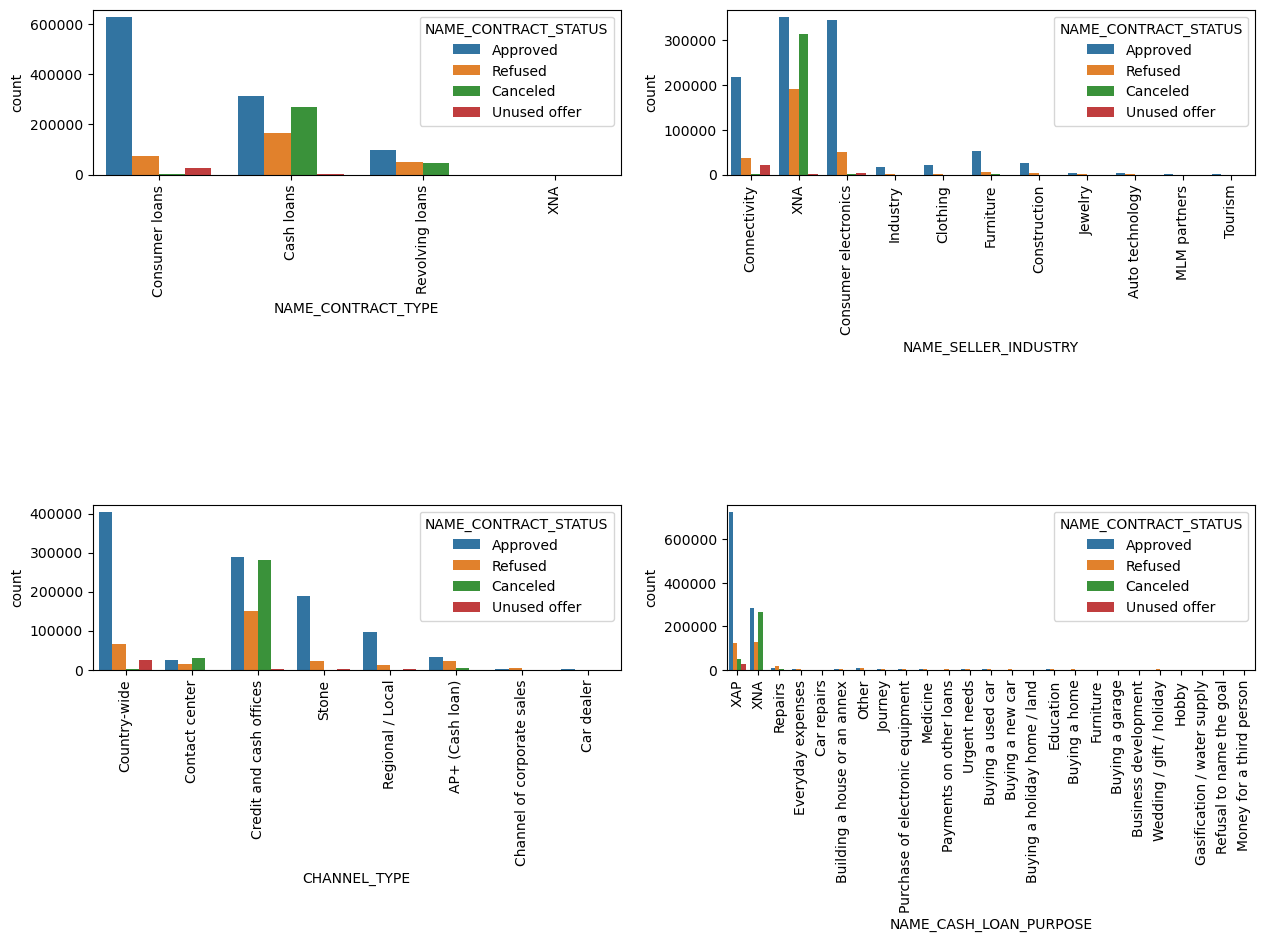

In [175]:
var = ["NAME_CONTRACT_TYPE", "NAME_SELLER_INDUSTRY", "CHANNEL_TYPE", "NAME_CASH_LOAN_PURPOSE"]

plt.figure(figsize = (15, 15))

for i in enumerate(var):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace= 2)
    sns.countplot(x = i[1], hue = "NAME_CONTRACT_STATUS", data = df_p)

    plt.rcParams['axes.titlesize'] = 16

    plt.xticks(rotation = 90)


#### For previous data applications

----
1. CASH LOANS have been cancelled and refused in greater amount as compared to CONSUMER LOANS.
2. REVOLVING loans have a significant share of cancelled and refused to that of passed category.

3. For INDUSTRY category majority of data is unavailable.
4. CONSUMER CATEGORY loans got maximum approval for loans and after that connectivity category got the maximum approvals.
5. Repairs got maximum rejection in the CASH LOAN PURPOSE.

# **MERGING DATASETS**



```
## SK_ID_CURR column  is the common column between the two datasets.

```



In [176]:
mer_df = pd.merge(df, df_p, on ='SK_ID_CURR', how = "inner")
mer_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,200000-300000,406597.5,10000-40000,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,200000-300000,1293502.5,10000-40000,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,200000-300000,1293502.5,10000-40000,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,200000-300000,1293502.5,10000-40000,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,<100000,135000.0,2000-5000,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [177]:
mer_df.shape

(1412493, 48)

In [178]:
mer_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLE

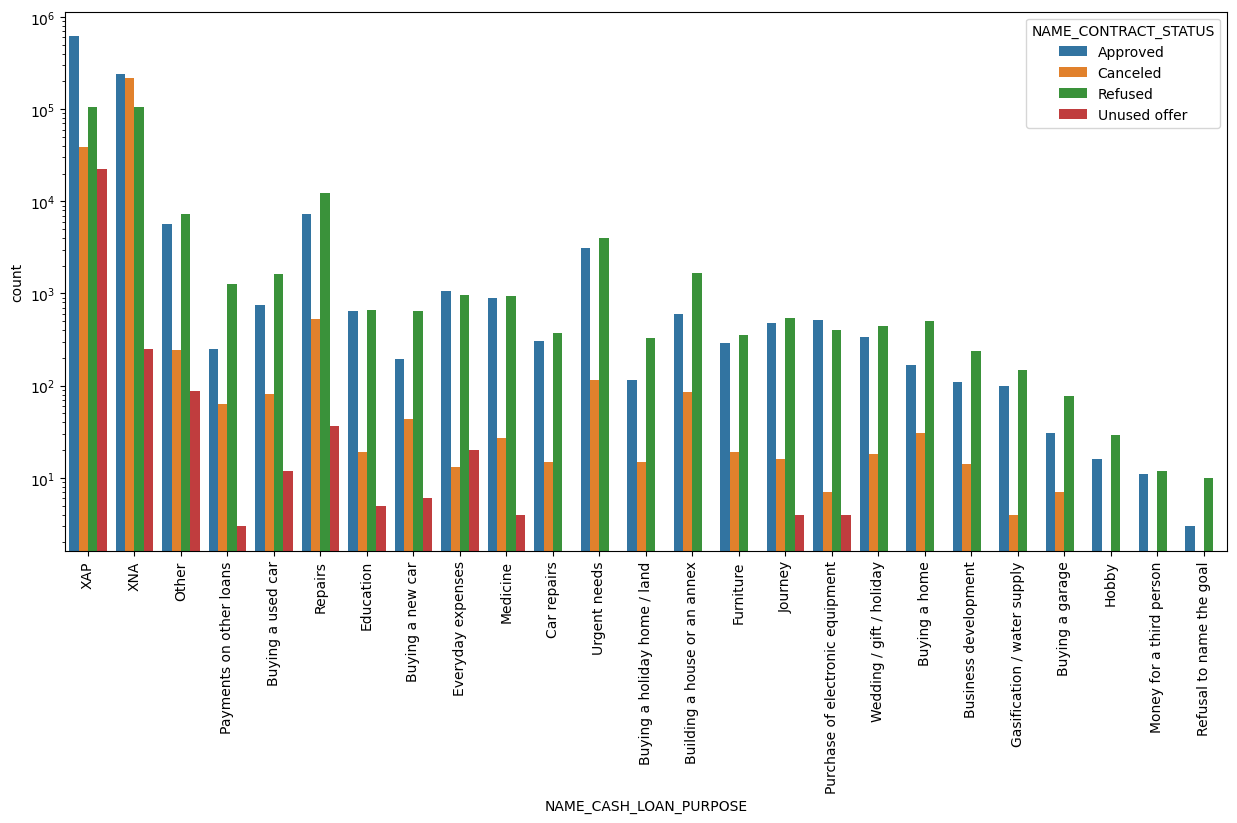

In [179]:
plt.figure(figsize = (15,7))
sns.countplot( data = mer_df, x = "NAME_CASH_LOAN_PURPOSE", hue = "NAME_CONTRACT_STATUS")
plt.xticks(rotation = 90)
plt.yscale("log")


### MERGED DATA ANALYSIS FOR VARIOUS CATEGORY

----
1. MAJORITY data is unavailable \.
2. REPAIRS category gor maximum refusal and cancelled.
3. URGENT NEEDS also fall under the category with almost equal refusal and cancelled category.
4. EVERYDAY expenses got maximum approval than refusal.

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

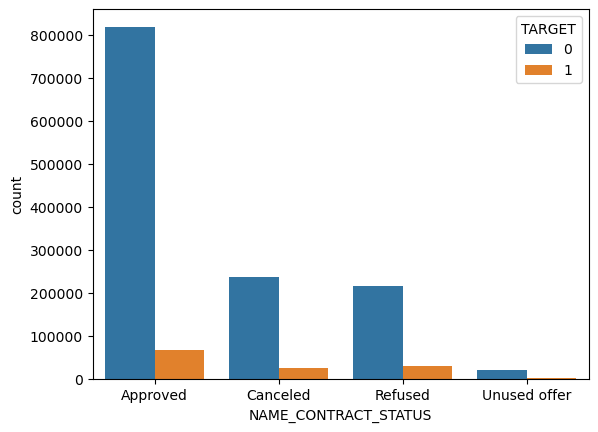

In [180]:
sns.countplot(data = mer_df, x = "NAME_CONTRACT_STATUS", hue = "TARGET")

#### CONTRACT STATUS Vs TARGET VARIABLE
----
    PEOPLE whose loan got refused or cancelled almost repayed the loans.
    

In [84]:
### Grouping loan APPROVAL data based on CONTRACT STATUS .

mer_gp= mer_df.groupby(["NAME_CONTRACT_STATUS", "TARGET"]).size().reset_index().rename(columns= {0:"counts"})

sum_df = mer_gp.groupby(["NAME_CONTRACT_STATUS"])["counts"].sum().reset_index()

mer_sum = pd.merge(mer_gp, sum_df, how = "left", on = "NAME_CONTRACT_STATUS")
mer_sum["%_age"] = round(mer_sum["counts_x"] / mer_sum["counts_y"] * 100, 2)
mer_sum



NameError: name 'mer_df' is not defined

In [184]:

mer_lo= mer_df.groupby(["NAME_CASH_LOAN_PURPOSE", "TARGET"]).size().reset_index().rename(columns= {0:"counts"})
mer_lo
sum_d = mer_lo.groupby(["NAME_CASH_LOAN_PURPOSE"])["counts"].sum().reset_index()

mer_s = pd.merge(mer_lo, sum_d, how = "left", on = "NAME_CASH_LOAN_PURPOSE")
mer_s["%_age"] = round(mer_s["counts_x"] / mer_s["counts_y"] * 100, 2)
mer_s

,NAME_CASH_LOAN_PURPOSE,TARGET,counts_x,counts_y,%_age
0,Building a house or an annex,0,2012,2336,86.13
1,Building a house or an annex,1,324,2336,13.87
2,Business development,0,312,358,87.15
3,Business development,1,46,358,12.85
4,Buying a garage,0,109,116,93.97
5,Buying a garage,1,7,116,6.03
6,Buying a holiday home / land,0,407,462,88.10
7,Buying a holiday home / land,1,55,462,11.90
8,Buying a home,0,617,701,88.02
9,Buying a home,1,84,701,11.98


## INSIGHTS AND CONCLUSION

----
1. OCCUPATION TYPE
  LOW SKILL labourers and drivers are highest defaulters.
  CORE STAFF , MANAGERS AND LABOURERS can be targeted with respect to the non deafulter and defaulter ratio .
  ACCOUNTANTS fall under less deafulters.

2. GENDER BASED
   Females can be the target audience as they have high ratio of non defaulters to defaulters.
   
3. EDUCATION TYPE
   WORKING PEOPLE AND HIGHER EDUCATION category can be targeted as they are less likely to default.

4. LOAN CATEGORY
   CONSUMER LOANS can be targeted.
   
5. INCOME CATEGORY
   PEOPLE income below 1 million and more than 1.5 million can be targeted.
   
6. ANNUITY AMOUNT
   PEOPLE who can pay annuity of 100k are more likely to get loans.
   

-----
### MERGED DATA

1. MOST  of the people who applied for loans have repayed.
2. Repairs category got the maximum cancellation. May be bank needs to check out for this segment before providing loans.
3. EVERYDAY expenses got maximum approval than refusal. So, this segment can be thought upon.
